In [ ]:
#MyNextMovie Recommender- (PROJECT 4) - DATA ANALYSIS AND MACHINE LEARNING INTERNSHIP PROGRAM
SUBMITTED BY: Sourabh Tagad
SUBMITTED TO: Anu maam 
DATE- JUN 2025

In [ ]:
Project - Travel Aggregator Analysis
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra, MMT, Goibibo).
It helps the user compare prices for their upcoming journeys on its platform and the customer is redirected to the desired platform 
after looking at the price.

In [ ]:
As a Data Analyst Using Python -- Performing Depth Analysis over the data collected from the csv files (Bookings.csv, Sessions.csv).
Pandas, Seaborn, and Matplotlib--popular Python libraries used for Data analysis and Visualization.

In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 1: Find the number of distinct bookings, sessions, and searches from the given datasets.

We will be starting by loading the `Bookings.csv` and `Sessions.csv` files. Then, we will identify how many unique bookings, sessions, and searches exist based on relevant columns in the dataset.


In [3]:
import pandas as pd

# Load the datasets
bookings = pd.read_csv("Bookings.csv")
sessions = pd.read_csv("Sessions.csv")

# Displaying the first few rows to understand the structure
bookings.head(), sessions.head()


(    customer_id   booking_id   from_city from_country            to_city  \
 0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
 1  customer_303  booking_156       Delhi        India           Brussels   
 2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
 3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
 4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   
 
   to_country          booking_time device_type_used  INR_Amount service_name  \
 0      India  2020-02-05T16:12:08Z          Desktop     2565.28          MMT   
 1    Belgium  2018-11-21T08:21:47Z          Android    23120.00        YATRA   
 2    Germany  2019-12-16T22:54:58Z          Android    25717.60        YATRA   
 3    Germany  2021-10-29T12:25:38Z          Desktop   135969.60      GOIBIBO   
 4     France  2020-08-11T16:09:10Z          Android    31791.20      GOIBIBO   
 
    no_of_passengers  days_to_departure  distanc

In [4]:
# Counting the  distinct values
unique_bookings = bookings['booking_id'].nunique()
unique_sessions = sessions['session_id'].nunique()
unique_searches = sessions['search_id'].nunique()

# Displaying the results
print(f"Distinct Bookings :",{unique_bookings})
print(f"Distinct Sessions :",{unique_sessions})
print(f"Distinct Searches :",{unique_searches})


Distinct Bookings : {339}
Distinct Sessions : {331}
Distinct Searches : {1360}


In [ ]:
#### Summary:

-Total unique bookings:339 
-Total unique sessions:331
-Total unique searches:1360  

This gives us a basic idea of how much user activity and traffic the platfrm handled in terms of bookings, sessions, and search attempts.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 2: How many sessions have more than one booking?

We will:
- Filter out the sessions that resulted in a booking.
- Group the data by `session_id`.
- Count how many sessions have more than one associated `booking_id`.


In [15]:
# Filter sessions that have a booking
sessions_with_booking = sessions[sessions['booking_id'].notna()]

# Group by session_id and count bookings per session
booking_counts = sessions_with_booking.groupby('session_id')['booking_id'].count()

# To Find sessions with more than one booking
multi_booking_sessions = booking_counts[booking_counts > 1]

# Printing the result
print(f"Number of sessions with more than one booking: {multi_booking_sessions.shape[0]}")


Number of sessions with more than one booking: 35


In [ ]:
#### Summary:

We found that there are 35 sessions where users made more than one booking during the same session.  
This could suggest repeat users or group bookings being made in a single browsing session.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 3: Which days of the week have the highest number of bookings? Also draw a pie chart to show the distribution for all days of the week?

We will:
- Convert the `booking_time` column to datetime.
- Extract the day of the week from each booking.
- Count bookings per day.
- Visualize the distribution using a pie chart.


0      Wednesday
1      Wednesday
2         Monday
3         Friday
4        Tuesday
         ...    
334       Friday
335     Saturday
336       Friday
337     Thursday
338       Monday
Name: booking_day, Length: 339, dtype: object
The day with the highest number of bookings is **Thursday** with 65 bookings.


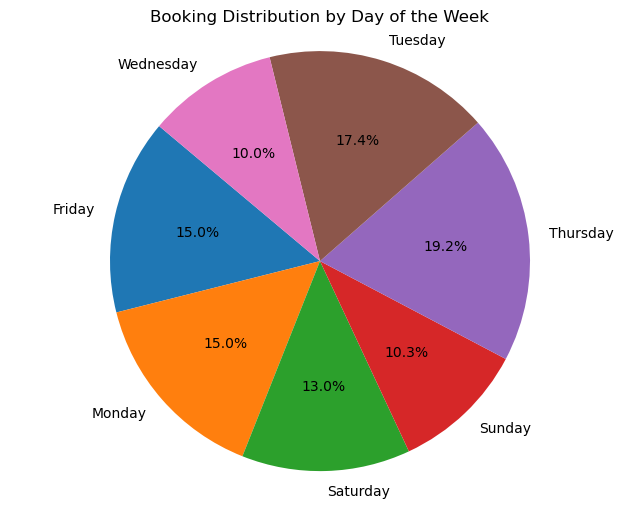

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert booking_time to datetime format
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract day of the week 
bookings['booking_day'] = bookings['booking_time'].dt.day_name()


# Counting the bookings per day
day_counts = bookings['booking_day'].value_counts().sort_index()  # sort_index to keep order Mon–Sun

# Showing the most booked day
most_booked_day = day_counts.idxmax()
most_booked_count = day_counts.max()

print(f"The day with the highest number of bookings is **{most_booked_day}** with {most_booked_count} bookings.")

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Booking Distribution by Day of the Week")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


In [ ]:
#### Summary:

- The highest number of bookings happened on: Thursday
- The pie chart above shows the distribution of bookings across all days.
- This insight can help the company optimize pricing, marketing, or server load for specific weekdays.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 4: For each service name, display the total number of bookings and total gross booking value (in INR)

Here we will group the bookings data by `service_name` and calculate:
- Total number of bookings per service.
- Total gross amount collected per service.


In [6]:
# Grouping by service_name
service_summary = bookings.groupby('service_name').agg(
    total_bookings = ('booking_id', 'count'),
    total_booking_value_in_inr = ('INR_Amount', 'sum')
).sort_values(by='total_booking_value_in_inr', ascending=False)

# Display the result
service_summary


,total_bookings,total_booking_value_in_inr
service_name,,
GOIBIBO,186,5897637.97
YATRA,105,3378702.13
MMT,48,665669.08


In [ ]:
#### Summary:

The table above shows:
- The number of bookings each travel service received.
- The total booking value (in INR) generated by each service.

This information is helpful for understanding which platform contributes the most to the aggregator's business.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 5: For customers who have more than one booking, which is the most booked route (from_city to to_city)?

We will:
- Identify customers with more than one booking.
- Filter bookings to include only those customers.
- Create a route column: from_city ➡ to_city.
- Count which route appears the most among those customers.


In [28]:
# Step 1: Find customers with more than one booking
repeat_customers = bookings['customer_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].index

# Step 2: Filter the bookings and make a safe copy
repeat_customer_bookings = bookings[bookings['customer_id'].isin(repeat_customers)].copy()

# Step 3: Create the route column
repeat_customer_bookings['route'] = repeat_customer_bookings['from_city'] + " and " + repeat_customer_bookings['to_city']

# Step 4: Find the most booked route among these customers
most_booked_route = repeat_customer_bookings['route'].value_counts().idxmax()
most_booked_route_count = repeat_customer_bookings['route'].value_counts().max()

print(f"The most booked route among repeat customers is: {most_booked_route} ({most_booked_route_count} times)")


The most booked route among repeat customers is: Gurgaon and Roissy-en-France (5 times)


In [ ]:
#### Summary:

We identified customers who booked more than once and analyzed their most frequent travel routes.

- Repeat Customers: Customers with more than one booking
- Most Booked Route (among them): Gurgaon and Roissy-en-France
- Number of Times Booked: 5 times

This insight can help in targeting loyal customers and offering personalized deals on their preferred routes.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 6: Which are the top 3 departure cities where customers book mostly in advance? provided that
there have been atleast 5 departures from that city?

We will:
- Use the `days_to_departure` column to calculate average booking gap per `from_city`.
- Filter only those cities that have at least 5 bookings.
- Return the top 3 cities with the highest average advance booking days.


In [29]:
# Step 1: Group by from_city and calculate average days_to_departure and booking count
city_advance = bookings.groupby('from_city').agg(
    avg_days_in_advance=('days_to_departure', 'mean'),
    total_bookings=('from_city', 'count')
)

# Step 2: Filtering the cities with at least 5 bookings
city_advance_filtered = city_advance[city_advance['total_bookings'] >= 5]

# Step 3: Sort by average advance booking days (descending) and take top 3
top_3_advance_cities = city_advance_filtered.sort_values(by='avg_days_in_advance', ascending=False).head(3)

# Display the result
top_3_advance_cities


,avg_days_in_advance,total_bookings
from_city,,
Bālāpur,46.166667,6
Devanhalli,29.583333,24
Chennai,26.187500,16


In [ ]:
#### Summary:

These are the top 3 departure cities where customers book their tickets the earliest (on average):

1. Balapur with 6 bookings
2. Devanhalli with 24 bookings
3. Chennai with 16 

Only cities with at least 5 departures were considered. This insight can help with dynamic pricing or early-bird offers in those cities.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 7:  Plot a HeatMap Displaying Correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

We will:
- Select only numerical columns from the `bookings` dataset.
- Compute the correlation matrix.
- Plot a heatmap using Seaborn.
- Identify the pair of columns (excluding self-correlations) that have the highest correlation value.


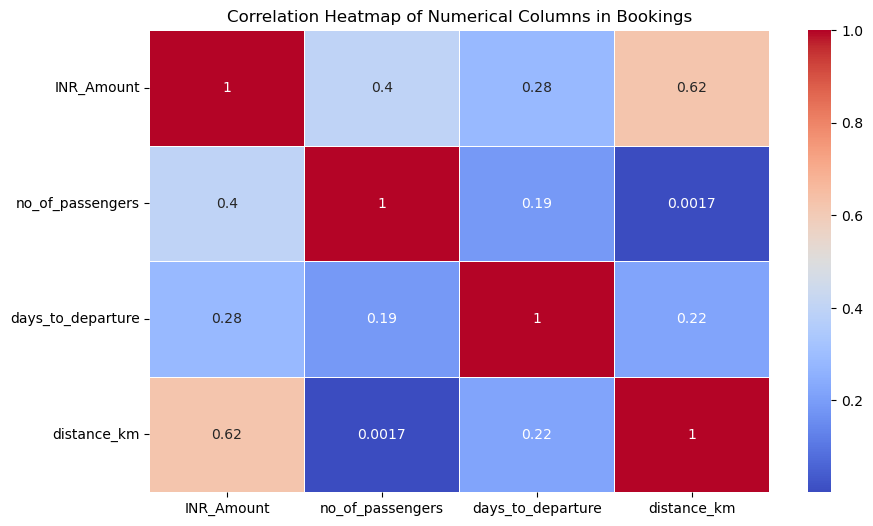

The most correlated pair is: INR_Amount and distance_km with a correlation of 0.62


In [30]:
import seaborn as sns
import numpy as np

# Step 1: Select numerical columns
numerical_cols = bookings.select_dtypes(include='number')

# Step 2: Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns in Bookings")
plt.show()

# Step 4: Find the most correlated pair (excluding diagonal 1.0 values)
corr_matrix_flat = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
max_corr_value = corr_matrix_flat.max().max()
max_corr_pair = corr_matrix_flat.stack().idxmax()

print(f"The most correlated pair is: {max_corr_pair[0]} and {max_corr_pair[1]} with a correlation of {max_corr_value:.2f}")


In [ ]:
#### Summary:

- The heatmap above shows correlations between all numerical columns in the bookings dataset.
- The strongest correlation** was found between:
- INR_Amount and distance_km
- Correlation coefficient: 0.62

This insight can help us identify which features are closely related — for example, if `distance_km` and `INR_Amount` are strongly correlated, it makes sense since longer trips might cost more.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 8: For each service, which is the most used device type for making bookings on the platform?

We will:
- Group bookings by both `service_name` and `device_type_used`.
- Count how many bookings were made on each device per service.
- For each service, pick the device type with the **highest count**.


In [31]:
# Step 1: Counting the bookings per service per device type
device_counts = bookings.groupby(['service_name', 'device_type_used'])['booking_id'].count()

# Step 2: Converting to DataFrame for easy manipulation
device_counts = device_counts.reset_index(name='booking_count')

# Step 3: Finding the most used device per service
most_used_device_per_service = device_counts.loc[device_counts.groupby('service_name')['booking_count'].idxmax()]

# Displaying the results
most_used_device_per_service


,service_name,device_type_used,booking_count
2,GOIBIBO,IOS,70
5,MMT,Desktop,30
9,YATRA,Desktop,51


In [ ]:
#### Summary:

For each service, the device type used the most for booking was:

- GOIBIBO --> IOS(70)
- MMT --> Desktop(30)
- YATRA --> Desktop(51)

This insight can help tailor user interface optimizations or push marketing strategies towards the dominant device type per platform.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 9: Plot the trends at a quarterly frequency for the number of bookings by each of the device types,that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

We will:
- Convert `booking_time` to datetime (if not already).
- Create a new column for quarter-year using pandas' `to_period('Q')`.
- Group by `quarter` and `device_type_used`.
- Count the number of bookings per device per quarter.
- Plot the trends using a line plot.


C:\Users\Saurabh Tagad\AppData\Local\Temp\ipykernel_2840\3012255142.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q').astype(str)


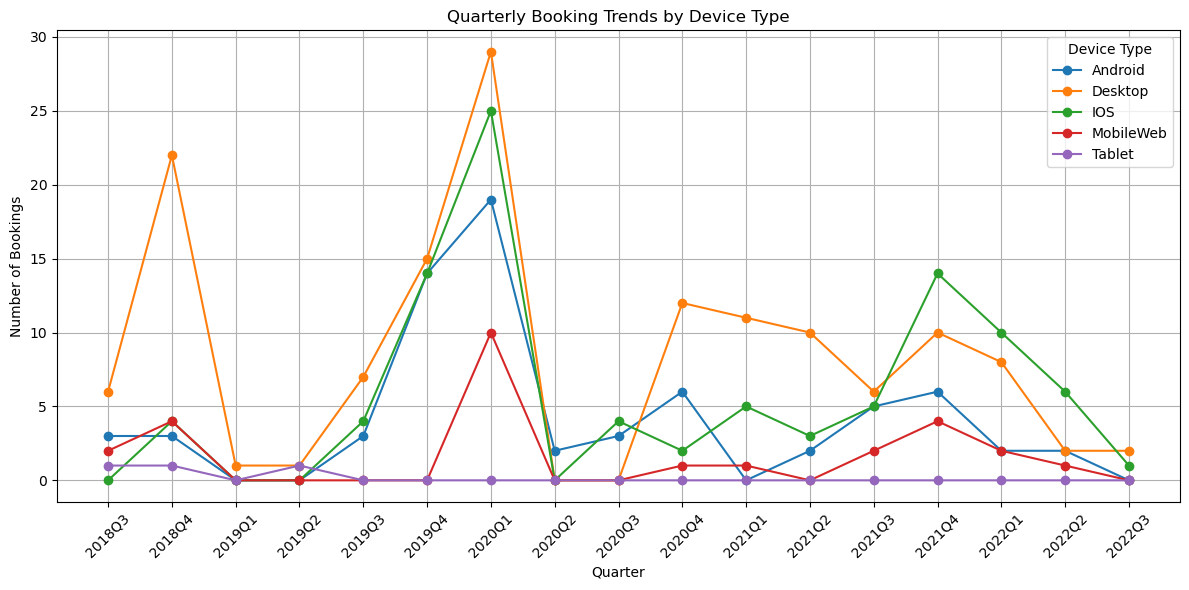

In [32]:
import matplotlib.pyplot as plt

# Step 1: Ensuring the booking_time is datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Step 2: Creating the  quarter column
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q').astype(str)

# Step 3: Grouping by quarter and device
quarterly_device_trend = bookings.groupby(['quarter', 'device_type_used'])['booking_id'].count().reset_index()

# Step 4: Pivot for plotting
trend_pivot = quarterly_device_trend.pivot(index='quarter', columns='device_type_used', values='booking_id').fillna(0)

# Step 5: Ploting the data 
plt.figure(figsize=(12, 6))
for device in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[device], label=device, marker='o')

plt.title("Quarterly Booking Trends by Device Type")
plt.xlabel("Quarter")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(title="Device Type")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Note: A warning may appear when converting `booking_time` to quarterly periods due to the timezone being dropped. 
Since We are only analyzing quarterly trends, this has absolutly no impact on the analysis and can be ignored.


In [ ]:
#### Summary:

- The plot shows how the usage of each device type for bookings has changed over time, broken down by quarters (e.g., 2020Q1, 2020Q2...).
- This helps visualize seasonal patterns and long-term shifts in device preference.
- Platforms can use this insight to improve their app or website and optimize user experince for the most-used devices during peak times.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------

In [ ]:
### Task 10: Consider the following example :12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.Searches =100, bookings=10 customers=12. 
#The overall booking to search ratio, Obsr is 10/100=0.1.Using the above information/content,answer the following:
1.What is the Average Obsr for each month of the year?
2.What is the Average Obsr for each day of the week?
3.Plot a time series of Obsr on the given datasets.

We will:
- Merge and align the `bookings` and `sessions` data.
- Calculate OBSR for different time periods.
- Analyze:
    1. Average OBSR per month
    2. Average OBSR per day of the week
    3. OBSR time series trend

Let OBSR(overall Booking to search ratio) be defined as:  
`OBSR = Number of bookings / Number of searches`


In [46]:
# Step 0: Converting booking_time and search_time to datetime safely
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], utc=True, errors='coerce')
sessions['search_time'] = pd.to_datetime(sessions['search_time'], utc=True, errors='coerce')

# Removing the timezone so no warnings are thrown for timezones information
bookings['booking_time'] = bookings['booking_time'].dt.tz_localize(None)
sessions['search_time'] = sessions['search_time'].dt.tz_localize(None)

# Step 1: Creating the month and weekday columns
bookings['month'] = bookings['booking_time'].dt.to_period('M').astype(str)
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q').astype(str)
sessions['month'] = sessions['search_time'].dt.to_period('M').astype(str)



In [47]:
# OBSR PER MONTH
# Monthly booking counts
monthly_bookings = bookings.groupby('month')['booking_id'].count()

# Monthly search counts
monthly_searches = sessions.groupby('month')['search_id'].count()

# Monthly OBSR
obsr_monthly = (monthly_bookings / monthly_searches).dropna().round(3)

# Displaying the result
print("Average OBSR per Month:")
print(obsr_monthly)


Average OBSR per Month:
month
2018-09    0.364
2018-10    0.087
2018-11    0.217
2018-12    0.171
2019-01    0.200
2019-06    1.000
2019-07    0.208
2019-08    0.286
2019-09    0.280
2019-10    0.214
2019-11    0.258
2019-12    0.213
2020-01    0.200
2020-02    0.284
2020-03    0.255
dtype: float64


In [48]:

# OBSR PER DAY OF WEEK
# Weekday booking counts
weekday_bookings = bookings.groupby('weekday')['booking_id'].count()

# Weekday search counts
weekday_searches = sessions.groupby('weekday')['search_id'].count()

# Weekday OBSR
obsr_weekday = (weekday_bookings / weekday_searches).dropna().round(3)

# Order of weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
obsr_weekday = obsr_weekday.reindex(ordered_days)

# Displaying the result
print("Average OBSR per Day of the Week:")
print(obsr_weekday)


Average OBSR per Day of the Week:
weekday
Monday       0.336
Tuesday      0.404
Wednesday    0.321
Thursday     0.346
Friday       0.372
Saturday     0.321
Sunday       0.603
dtype: float64


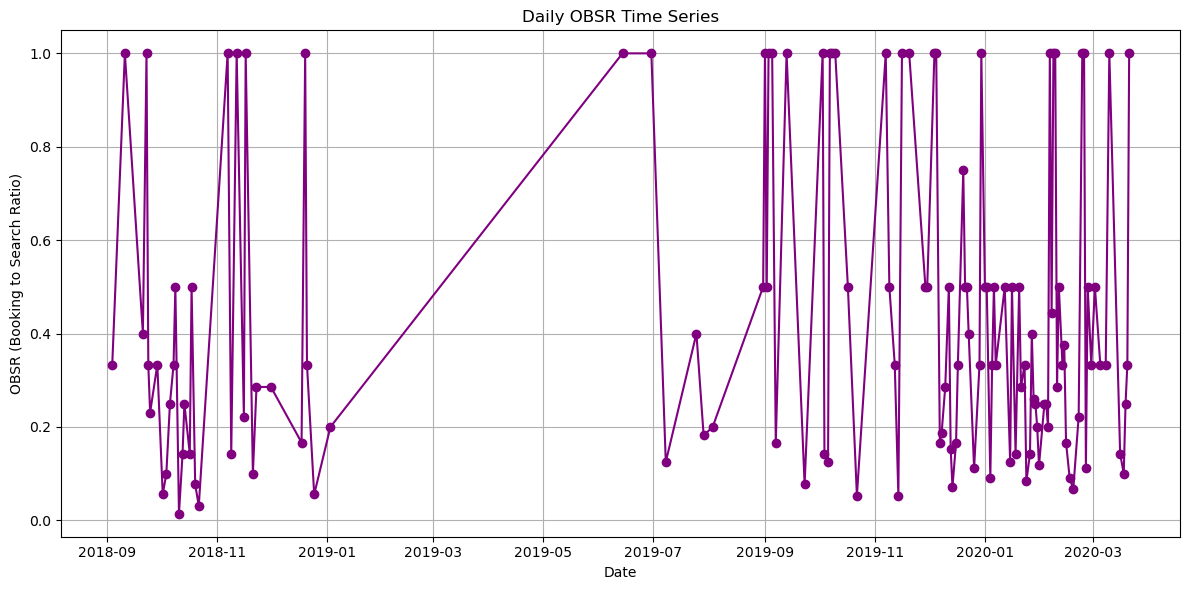

In [45]:

# OBSR Time Series Plot
# Daily bookings and searches
bookings_daily = bookings.groupby(bookings['booking_time'].dt.date)['booking_id'].count()
searches_daily = sessions.groupby(sessions['search_time'].dt.date)['search_id'].count()

# Align indexes
obsr_daily = (bookings_daily / searches_daily).dropna()

# Plot
plt.figure(figsize=(12,6))
plt.plot(obsr_daily.index, obsr_daily.values, marker='o', linestyle='-', color='purple')
plt.title("Daily OBSR Time Series")
plt.xlabel("Date")
plt.ylabel("OBSR (Booking to Search Ratio)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#### Summary:

- OBSR per Month shows seasonal or monthly booking performance relative to search traffic.
- OBSR per Weekday helps understand which days users convert more.
- The time series plot reveals booking-to-search trends over time — showing when users are more likely to finalize bookings.

 This insight is crucial for optimizing marketing campaigns, improving user experience on high-converting days, and resource planning for spikes.


In [ ]:
-----------------------------------********************************************************************************-----------------------------------